<a href="https://colab.research.google.com/github/Aditya-282001/Analysis-on-Netflix-Stock-Price-Datset-/blob/main/Analysis_using_linear_ridge_lasso_decisionTree_NFLX_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving NFLX.csv to NFLX.csv


In [ ]:
df=pd.read_csv('NFLX.csv',parse_dates=True,index_col='Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1009 entries, 2018-02-05 to 2022-02-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1009 non-null   float64
 1   High       1009 non-null   float64
 2   Low        1009 non-null   float64
 3   Close      1009 non-null   float64
 4   Adj Close  1009 non-null   float64
 5   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.2 KB


Checks if there is any Null value present in the dataset

In [ ]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

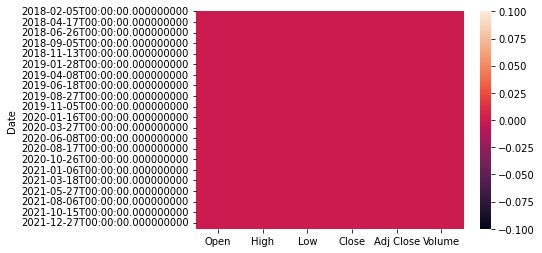

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [ ]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838
High,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699
Low,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116
Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Adj Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Volume,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000


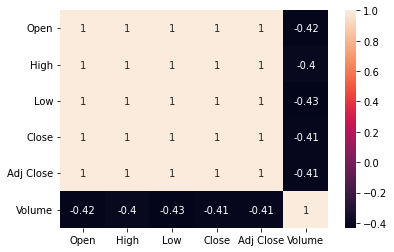

In [ ]:
sns.heatmap(df.corr(),annot=True)

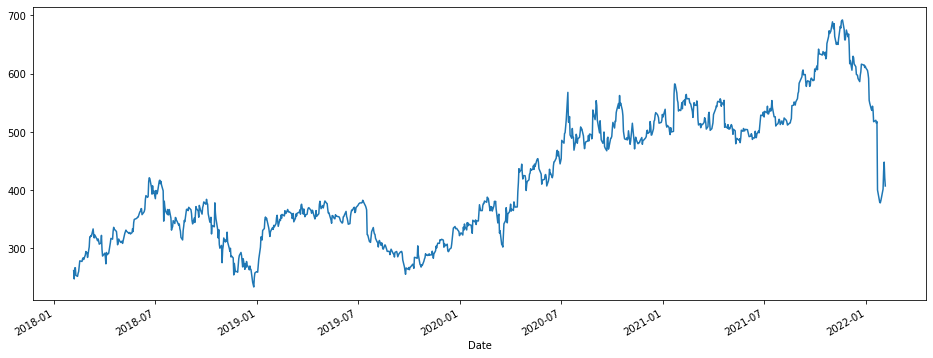

In [ ]:
plt.figure(figsize=(16,6))
df['Open'].plot()
plt.show()

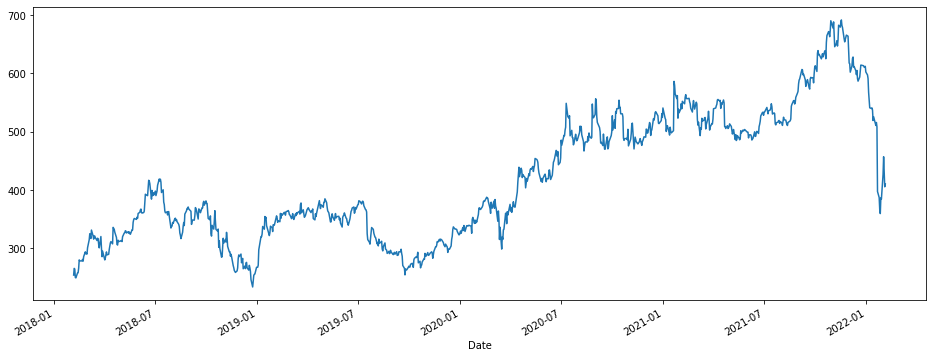

In [ ]:
plt.figure(figsize=(16,6))
df['Close'].plot()
plt.show()
#sns.jointplot(x='Open',y='Close',data=df,kind='reg')

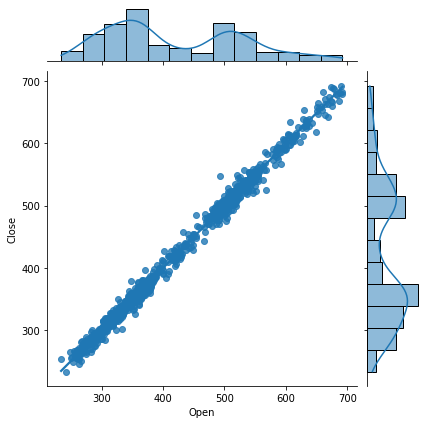

In [ ]:
sns.jointplot(x='Open',y='Close',data=df,kind='reg')

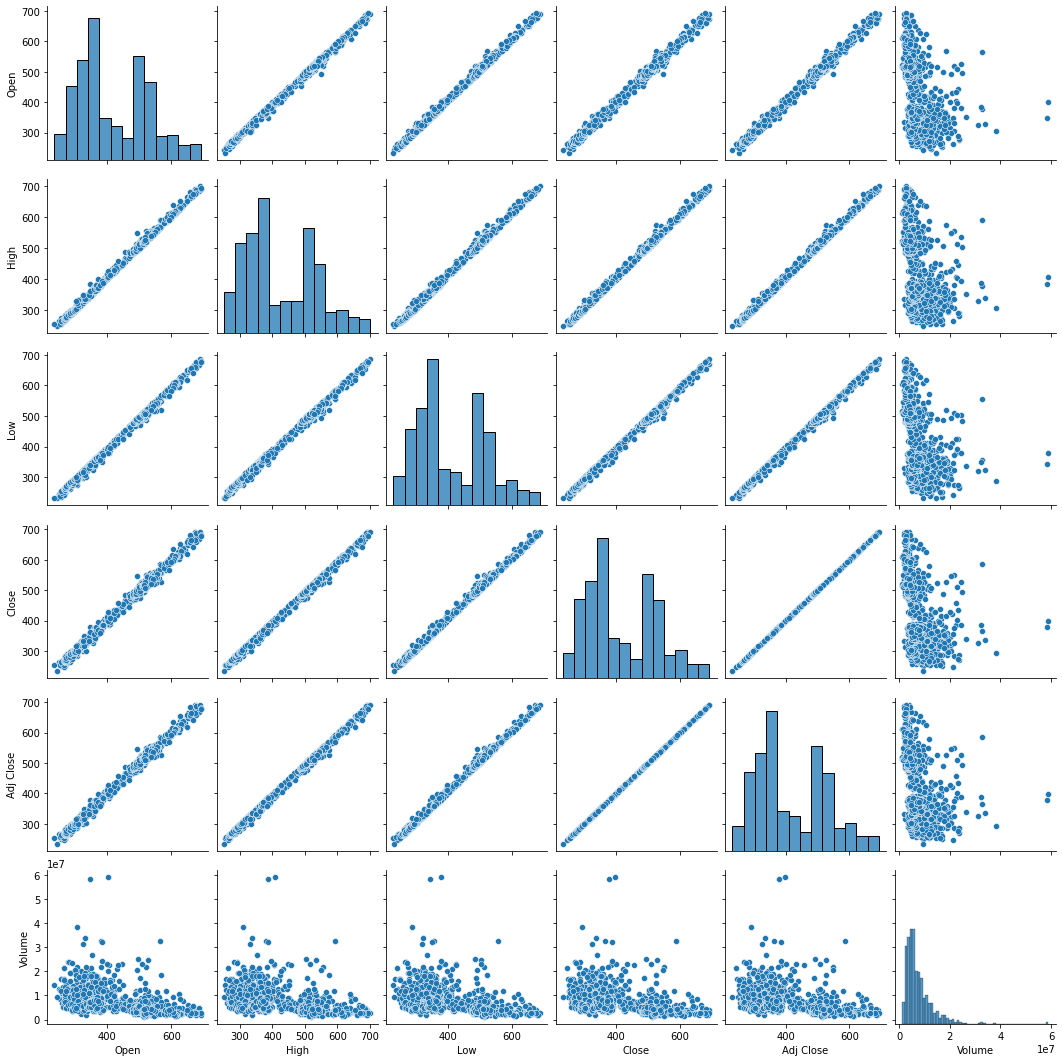

In [ ]:
sns.pairplot(df)

In [ ]:
#converting Volume column from integer to float
df['Volume']=df['Volume'].astype(dtype=float)


In [ ]:
#drop unnecessary column
df.drop(columns='Adj Close',axis=1,inplace=True)

In [ ]:
#Divide the dataset into dependent and independent one
X=df[['Open','High','Low','Volume']]
y=df['Close'].values

feature=X

In [ ]:
X

,Open,High,Low,Volume
Date,,,,
2018-02-05,262.000000,267.899994,250.029999,11896100.0
2018-02-06,247.699997,266.700012,245.000000,12595800.0
2018-02-07,266.579987,272.450012,264.329987,8981500.0
2018-02-08,267.079987,267.619995,250.000000,9306700.0
2018-02-09,253.850006,255.800003,236.110001,16906900.0
...,...,...,...,...
2022-01-31,401.970001,427.700012,398.200012,20047500.0
2022-02-01,432.959991,458.480011,425.540009,22542300.0
2022-02-02,448.250000,451.980011,426.480011,14346000.0


In [ ]:
y

array([254.259995, 265.720001, 264.559998, ..., 429.480011, 405.600006,
       410.170013])

In [ ]:
#do the pre-processing
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)


In [ ]:
X

array([[-1.44777164, -1.4414654 , -1.51014126,  0.7917907 ],
       [-1.57958866, -1.45245336, -1.55693083,  0.91987459],
       [-1.40555345, -1.39980192, -1.37712127,  0.25825734],
       ...,
       [ 0.26907561,  0.24411318,  0.13121518,  1.2402582 ],
       [ 0.02194181,  0.03607133, -0.07529165,  0.42734564],
       [-0.10830817, -0.11492402, -0.14635958,  0.03875557]])

Divide the dataset into Train and Test Part

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

Applying Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
Linear=LinearRegression()

In [ ]:
Linear.fit(X_train,y_train)

LinearRegression()

In [ ]:
print('Linear Regression Coefficient(m)',Linear.coef_)
print('Linear Regression Coefficient(c)',Linear.intercept_)

Linear Regression Coefficient(m) [-66.82486776  87.35625067  87.82321978   0.61553459]
Linear Regression Coefficient(c) 419.02728345398566


In [ ]:
y_predict=Linear.predict(X_test)
y_predict

array([533.55151603, 340.39145692, 327.0419562 , 290.64794168,
       372.68407278, 484.64728425, 345.10563612, 393.22703354,
       362.34557099, 592.98789503, 378.5013476 , 484.57235489,
       588.50269268, 415.30755168, 547.92751434, 319.05560945,
       486.02157709, 305.87739498, 356.02989607, 283.59513235,
       312.21178893, 329.80932083, 532.83013654, 517.10043675,
       290.63679366, 480.61664579, 386.6285054 , 593.06341955,
       387.51836316, 363.51202504, 352.78474155, 365.92999433,
       513.11871627, 367.81310821, 461.47678689, 294.46829372,
       649.99919513, 364.17773761, 546.65326309, 551.78836237,
       679.40748433, 650.18815699, 423.14160328, 290.04899599,
       321.44730626, 485.04934568, 290.5992764 , 293.30867414,
       310.16664956, 518.64908244, 330.18088498, 357.03730748,
       378.92318615, 510.39230394, 349.8459886 , 534.74998442,
       499.9278849 , 379.73234549, 502.93631543, 269.88750099,
       376.32238488, 363.09913797, 502.14322247, 372.42

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

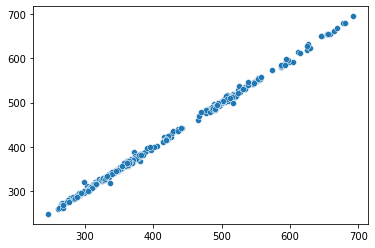

In [ ]:
sns.scatterplot(x=y_test,y=y_predict)

In [ ]:
MSE=mean_squared_error(y_test,y_predict)
MSE

16.063008849727385

In [ ]:
MAE=mean_absolute_error(y_test,y_predict)
MAE

2.849288269993139

In [ ]:
r2_score(y_test,y_predict)


0.99856029806264

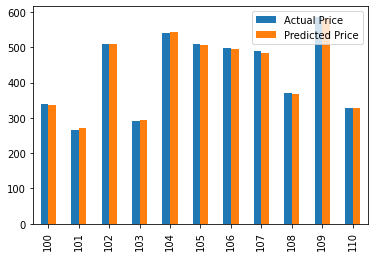

In [ ]:
#This shows the barchart of the actual closing price and the predicted price of LinearRegression

data_temp=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_predict})
data_temp[100:111].plot(kind='bar')


Applying Ridge Concept

In [ ]:
from sklearn.linear_model import Lasso,Ridge

In [ ]:
regressor_ridge=Ridge(alpha=200)
regressor_ridge.fit(X_train,y_train)
print('Linear Model Coefficient(m):',regressor_ridge.coef_)
print('Linear Model Coefficient(c):',regressor_ridge.intercept_)

Linear Model Coefficient(m): [32.05848054 32.95922579 32.57783774 -3.38125031]
Linear Model Coefficient(c): 419.12636500295184


In [ ]:
y_predict_1=regressor_ridge.predict(X_test)
y_predict_1

array([527.26549933, 343.95725835, 339.6446708 , 305.3132014 ,
       381.59064259, 483.58358362, 357.53829459, 386.52817572,
       356.84294974, 581.7250958 , 385.04271353, 476.70160783,
       573.44381771, 418.41294799, 536.87163697, 330.11046862,
       489.43741321, 322.63516824, 357.65210039, 293.99503238,
       320.6819328 , 337.97719255, 526.62969959, 504.37395423,
       299.82914825, 476.25315482, 389.62144014, 581.57080263,
       388.00552995, 374.34078919, 359.85839406, 371.51134978,
       508.17980824, 382.02206425, 458.21103745, 306.63341649,
       632.00441571, 368.34318954, 535.88968358, 534.01422057,
       657.84530434, 635.94723329, 418.10926425, 306.96870357,
       334.41415982, 480.40585107, 303.87956805, 304.47880106,
       312.45968269, 509.17078897, 331.02876978, 361.71643809,
       384.02377967, 505.49202097, 357.65366939, 521.66101141,
       497.42015857, 383.96167794, 500.85419757, 282.19320334,
       382.49405751, 366.56101462, 492.4555584 , 375.98

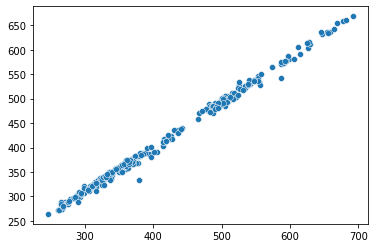

In [ ]:
sns.scatterplot(x=y_test,y=y_predict_1)

In [ ]:
MSE=mean_squared_error(y_test,y_predict_1)
MSE

127.41748487790275

In [ ]:
MAE=mean_absolute_error(y_test,y_predict_1)
MAE

9.487324059510188

In [ ]:
r2_score(y_test,y_predict_1)

0.9885797734690681

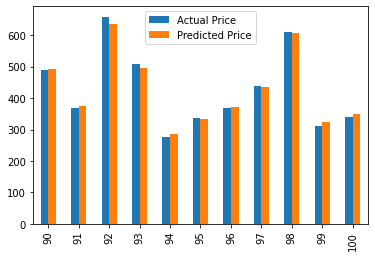

In [ ]:
#This shows the barchart of the actual closing price and the predicted price of Ridge

data_temp=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_predict_1})
data_temp[90:101].plot(kind='bar')


Applying Lasso Concept

In [ ]:
regressor_lasso=Lasso()
regressor_lasso.fit(X_train,y_train)
print('Linear Model Coefficient(m):',regressor_lasso.coef_)
print('Linear Model Coefficient(c):',regressor_lasso.intercept_)

Linear Model Coefficient(m): [ 0.         60.85312151 46.30892224 -0.        ]
Linear Model Coefficient(c): 419.0426970801805


In [ ]:
y_predict_2=regressor_lasso.predict(X_test)
y_predict_2

array([537.67583028, 337.9729538 , 328.93621934, 291.52655757,
       375.99247842, 485.74962012, 348.61585237, 389.61839153,
       359.44396436, 593.3636518 , 378.71088052, 482.22241388,
       585.41348625, 416.01932376, 545.54774244, 323.86139119,
       492.79182697, 310.4380834 , 353.80914284, 282.8216646 ,
       312.47455066, 329.53154596, 532.53754695, 516.2315588 ,
       290.03073759, 479.12852006, 393.78702999, 593.69881992,
       384.81034263, 367.82193325, 352.88793878, 366.07159703,
       513.41223037, 374.80077757, 460.20396467, 296.63954369,
       648.95759145, 363.73620848, 543.91777861, 546.55032631,
       677.85723302, 653.16566348, 420.24150356, 293.34555589,
       325.55822051, 483.37433091, 290.98102676, 292.70445972,
       308.0743497 , 515.30695332, 331.19751262, 356.71085674,
       378.41410051, 510.8032097 , 349.76274   , 530.12077337,
       500.4430308 , 379.90342299, 505.48618267, 270.08737852,
       377.58824203, 361.71892854, 498.85345626, 372.04

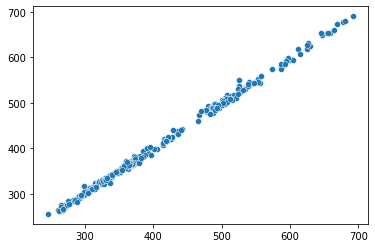

In [ ]:
sns.scatterplot(x=y_test,y=y_predict_2)

In [ ]:
MSE=mean_squared_error(y_test,y_predict_2)
MSE

24.578694494279688

In [ ]:
MAE=mean_absolute_error(y_test,y_predict_2)
MAE

3.765591030730697

In [ ]:
r2_score(y_test,y_predict_2)

0.997797050701258

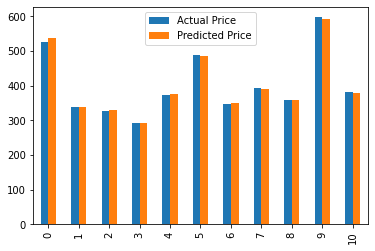

In [ ]:
#This shows the barchart of the actual closing price and the predicted price of Lasso

data_temp=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_predict_2})
data_temp.head(11).plot(kind='bar')


Applying Decision Tree Concept(Taking depth=3)

In [ ]:
from sklearn import tree

In [ ]:
reg_tree=tree.DecisionTreeRegressor(max_depth=3)
reg_tree

DecisionTreeRegressor(max_depth=3)

In [ ]:
reg_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
y_predict_tree=reg_tree.predict(X_test)

In [ ]:
r2_score(y_test,y_predict_tree)

0.9799801305532506

In [ ]:
mean_squared_error(y_test,y_predict_tree)


223.3652200838282

In [ ]:
mean_absolute_error(y_test,y_predict_tree)

11.916028687662921

Plotting Decision Tree

In [ ]:
from IPython.display import Image
import pydotplus

In [ ]:
dot_data=tree.export_graphviz(reg_tree,out_file=None,filled=True,feature_names=feature.columns)
graph=pydotplus.graph_from_dot_data(dot_data)

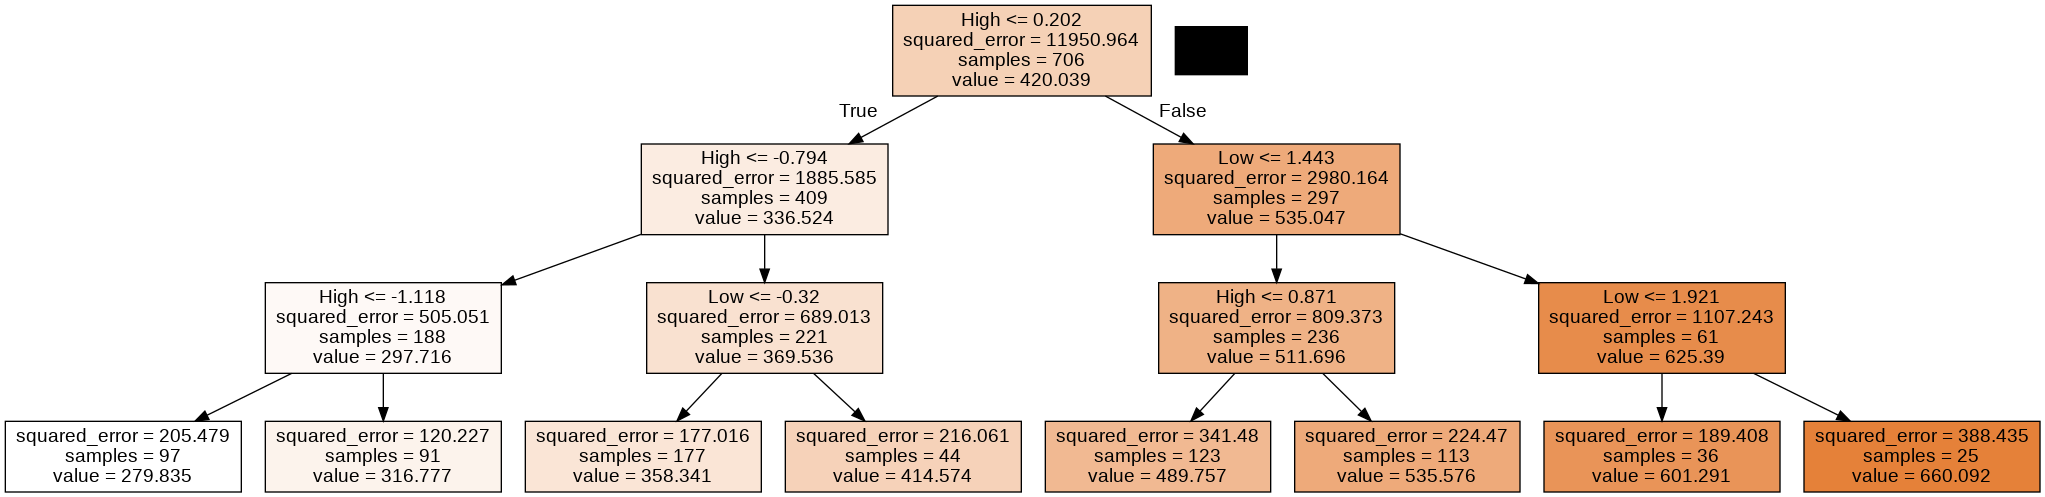

In [ ]:
Image(graph.create_png())

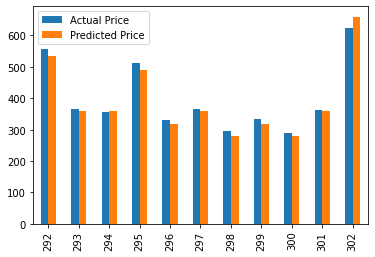

In [ ]:
#This shows the barchart of the actual closing price and the predicted price of Decision Tree(Depth=3)

data_temp=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_predict_tree})
data_temp.tail(11).plot(kind='bar')


Applying Decision Tree Concept(Taking depth=6)

In [ ]:
reg_tree_1=tree.DecisionTreeRegressor(max_depth=6)
reg_tree_1.fit(X_train,y_train)



DecisionTreeRegressor(max_depth=6)

In [ ]:
dot_data=tree.export_graphviz(reg_tree_1,out_file=None,filled=True,feature_names=feature.columns)
graph1=pydotplus.graph_from_dot_data(dot_data)

Plotting Decision Tree

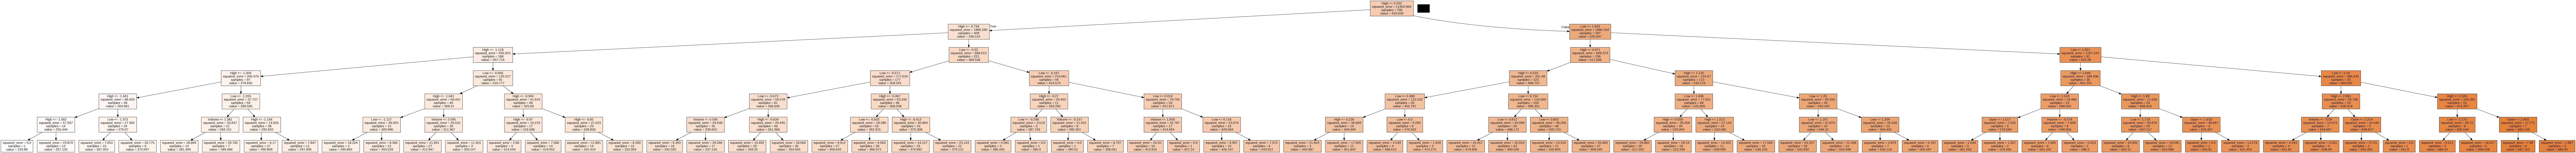

In [ ]:
Image(graph1.create_png())

In [ ]:
y_predict_tree_1=reg_tree_1.predict(X_test)
r2_score(y_test,y_predict_tree_1)

0.9962541089753177

In [ ]:
mean_squared_error(y_test,y_predict_tree_1)

41.79356790331375

In [ ]:
mean_absolute_error(y_test,y_predict_tree_1)

4.7271473052193045

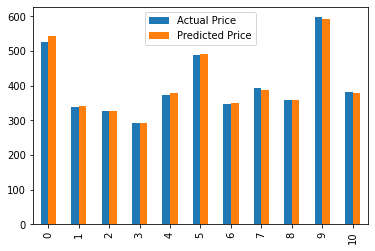

In [ ]:
#This shows the barchart of the actual closing price and the predicted price of Decision Tree(Depth=6)

data_temp=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_predict_tree_1})
data_temp.head(11).plot(kind='bar')


In [ ]:
#Just making a dictionary and store all the R2 Score of the algorithms.
linear=r2_score(y_test,y_predict)
ridge=r2_score(y_test,y_predict_1)
lasso=r2_score(y_test,y_predict_2)
decision_tree_d_3=r2_score(y_test,y_predict_tree)
decision_tree_d_6=r2_score(y_test,y_predict_tree_1)


dict_a={'Linear':linear,'Ridge':ridge,'Lasso':lasso,'Decision Tree(depth=3)':decision_tree_d_3,'Decision Tree(depth=6)':decision_tree_d_6}
dict_a


{'Decision Tree(depth=3)': 0.9799801305532506,
 'Decision Tree(depth=6)': 0.9962541089753177,
 'Lasso': 0.997797050701258,
 'Linear': 0.99856029806264,
 'Ridge': 0.9885797734690681}

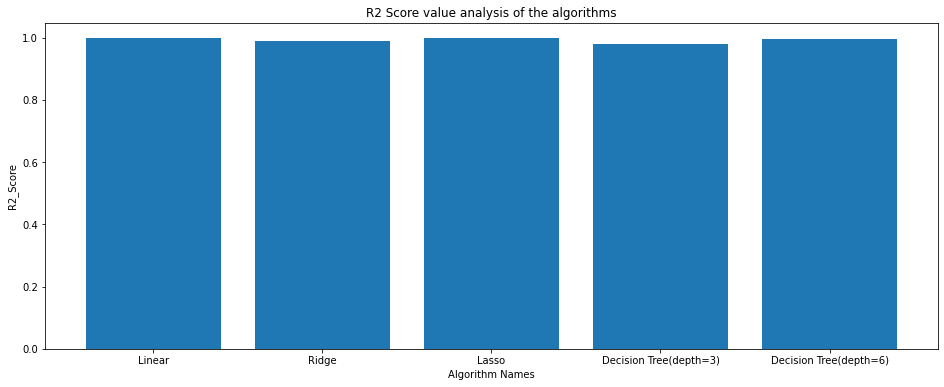

In [ ]:
names = list(dict_a.keys())
values = list(dict_a.values())
plt.figure(figsize=(16,6))
plt.title('R2 Score value analysis of the algorithms')
plt.xlabel('Algorithm Names')
plt.ylabel('R2_Score')
plt.bar(range(len(dict_a)), values, tick_label=names)
plt.show()